## Data Pre-processing

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Basic info
print("Shape:", df.shape)
df.info()

# Summary statistics
df.describe().T

Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
# Columns where 0 likely means missing
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols].isin([0]).sum().sort_values(ascending=False)

Insulin          374
SkinThickness    227
BloodPressure     35
BMI               11
Glucose            5
dtype: int64

In [10]:
# Replacing zeros with NaN to handle invalid zero entries
df['Insulin'].replace(0, np.nan, inplace=True)
df['SkinThickness'].replace(0, np.nan, inplace=True)
df['BloodPressure'].replace(0, np.nan, inplace=True)
df['BMI'].replace(0, np.nan, inplace=True)
df['Glucose'].replace(0, np.nan, inplace=True)

# Impute missing values with median for numerical features
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['Glucose'].fillna(df['Glucose'].median(), inplace=True)

# Verify if any missing data still remains
missing_data_after = df.isnull().sum()
print("Missing Values After Imputation:\n", missing_data_after)

# Summary statistics
df.describe().T

Missing Values After Imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Univariate Analysis

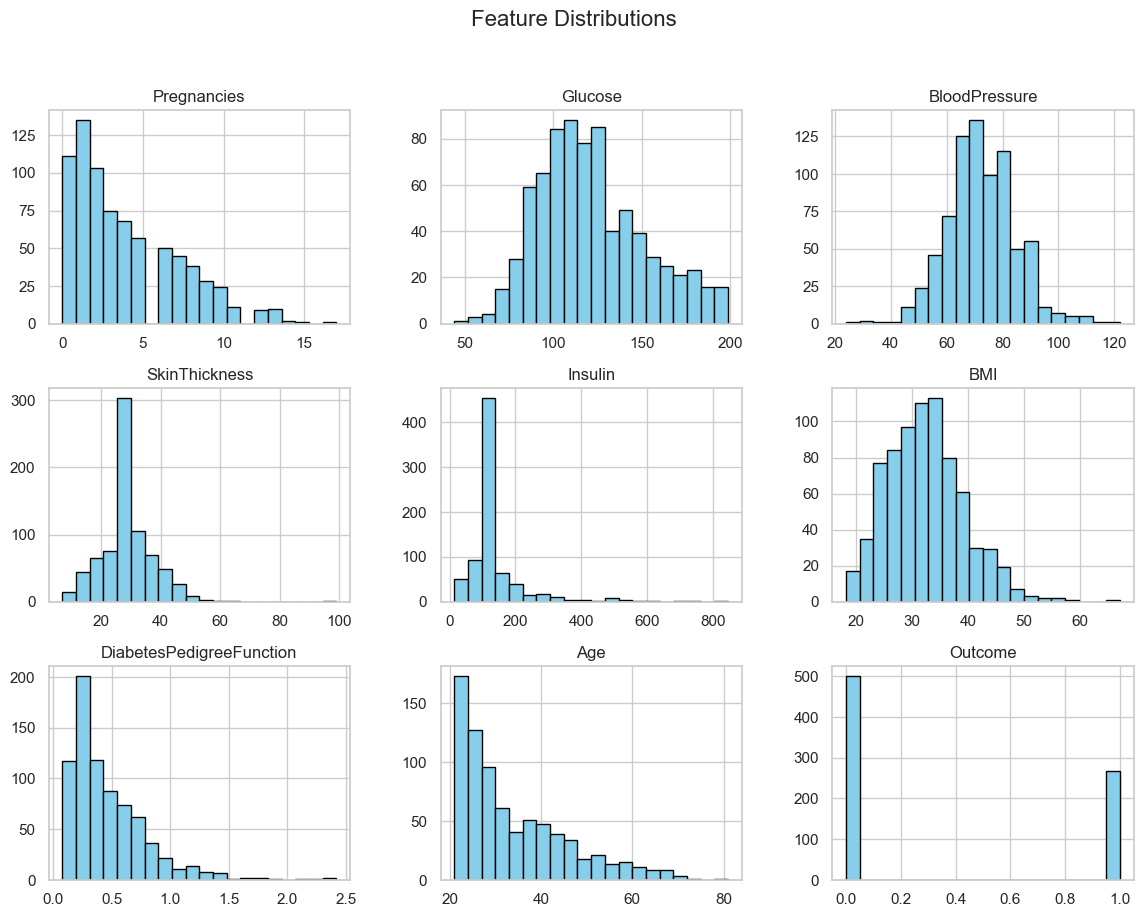

In [15]:
# Histograms for all features
df.hist(bins=20, figsize=(14, 10), color="#87ceeb", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

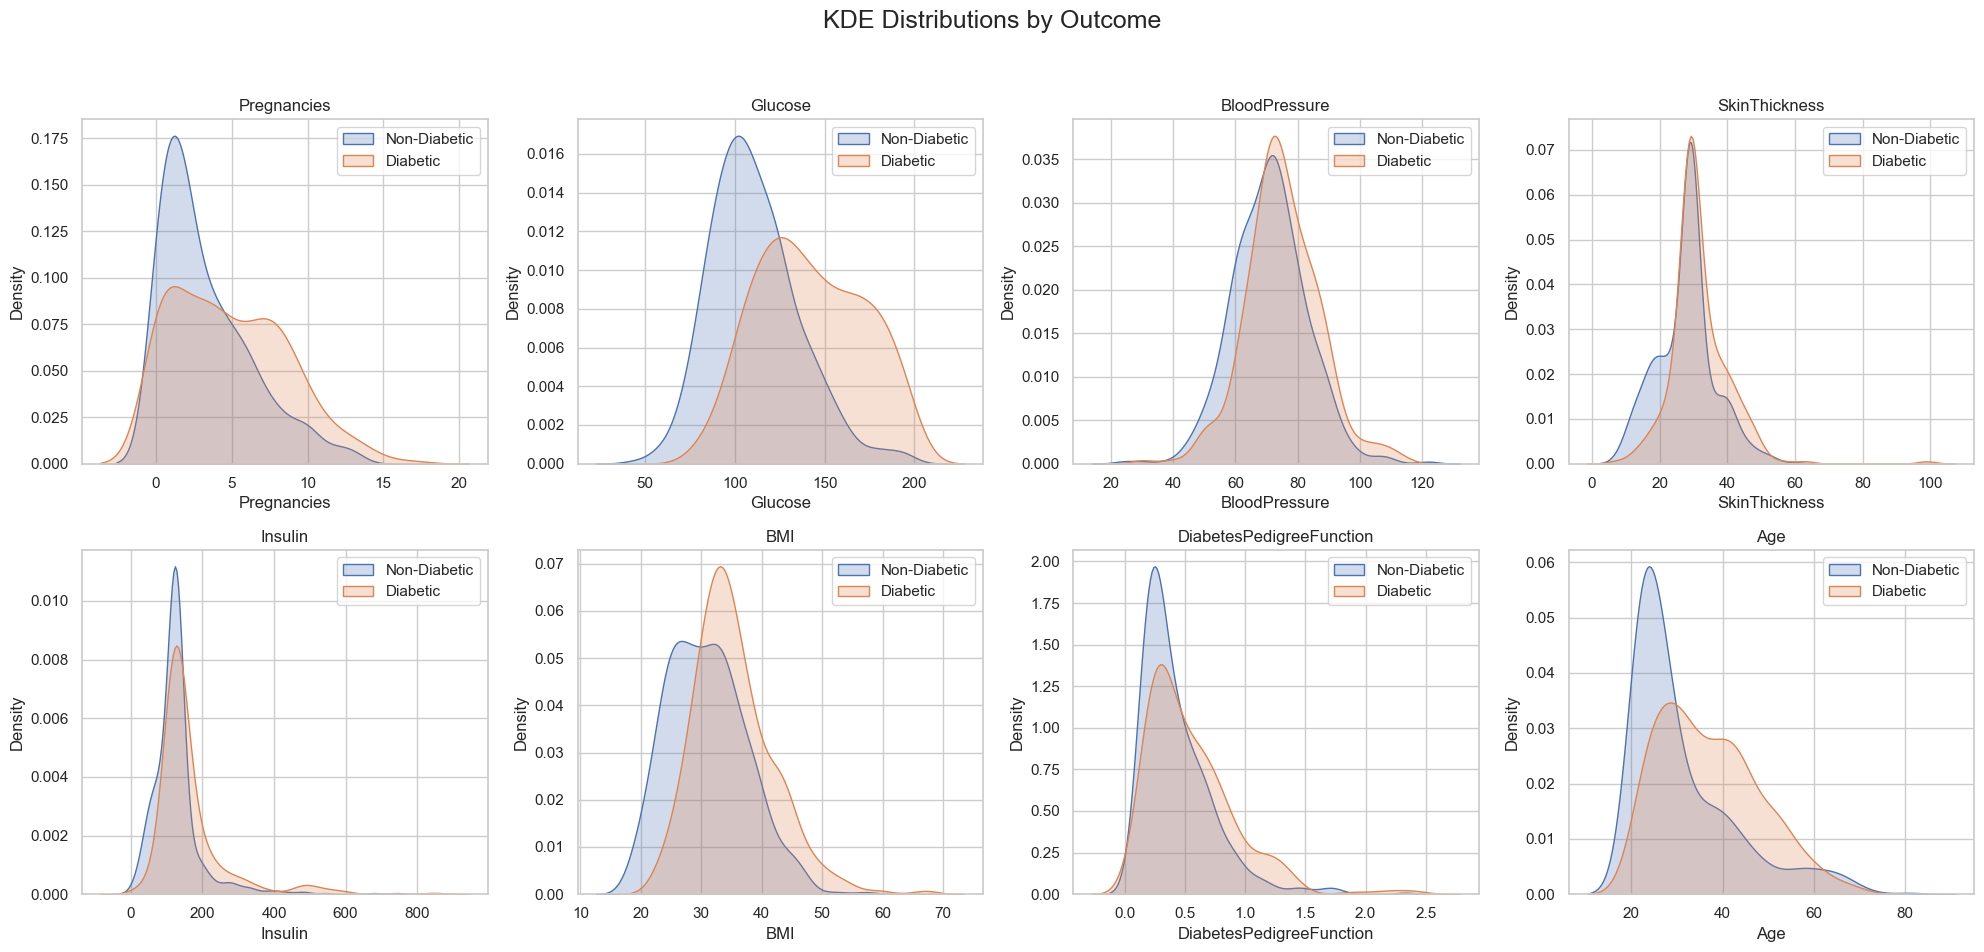

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df.columns[:-1]  # Exclude 'Outcome'
n_features = len(features)

rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
fig.suptitle("KDE Distributions by Outcome", fontsize=18)

for i, col in enumerate(features):
    r = i // cols
    c = i % cols
    ax = axes[r, c]

    sns.kdeplot(df[df['Outcome'] == 0][col], label='Non-Diabetic', shade=True, ax=ax)
    sns.kdeplot(df[df['Outcome'] == 1][col], label='Diabetic', shade=True, ax=ax)

    ax.set_title(col)
    ax.legend()

# Remove empty plots if features < total grid slots
if n_features < rows * cols:
    for j in range(n_features, rows * cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

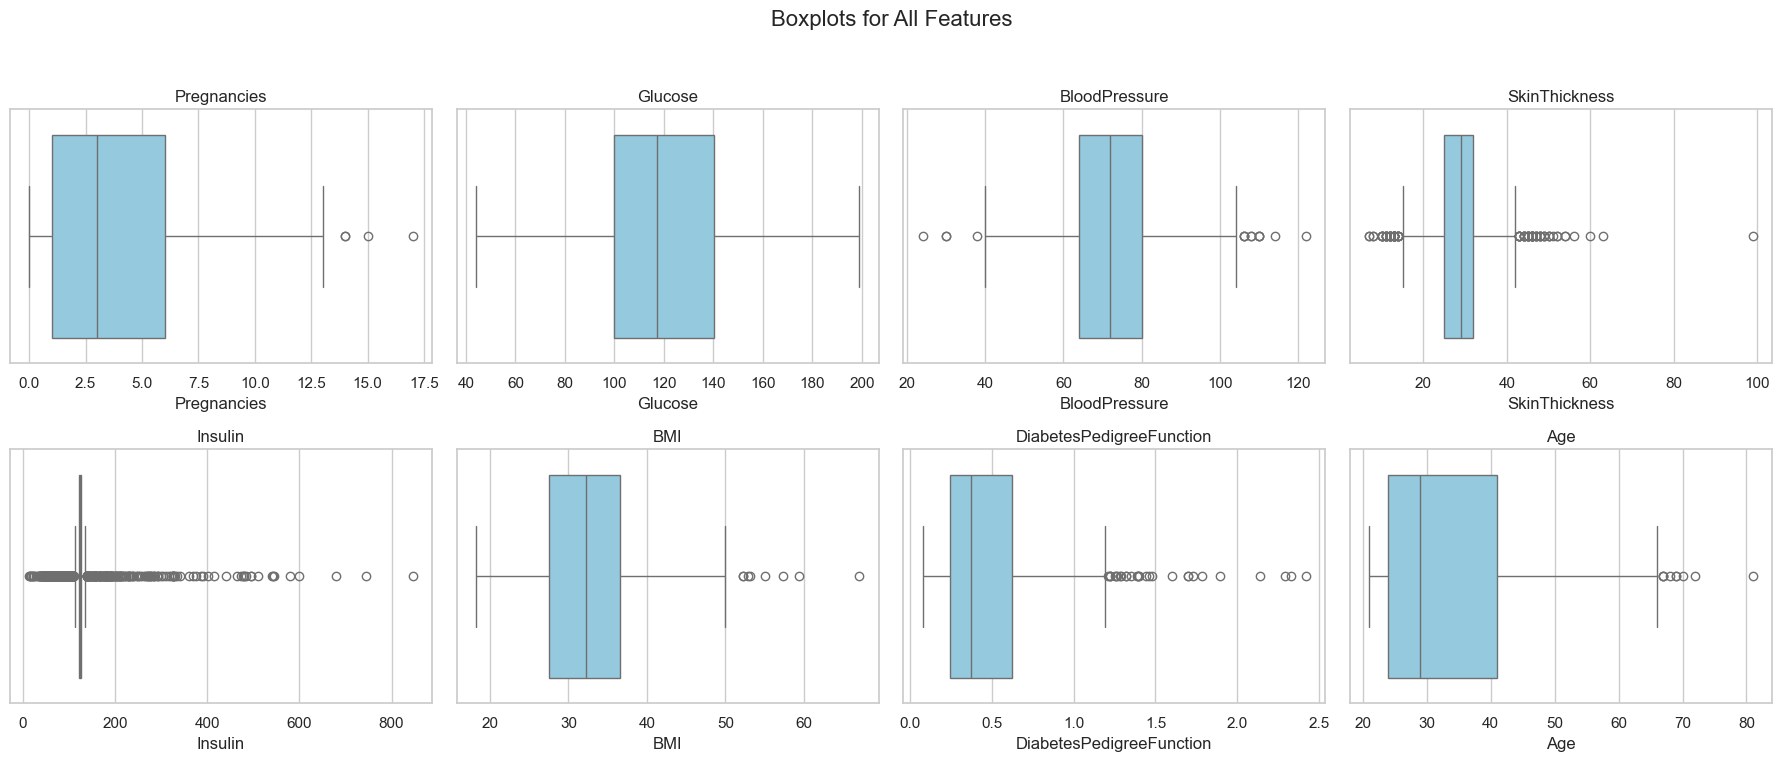

In [25]:
features = df.columns[:-1]  # Exclude 'Outcome'
n_features = len(features)

# Set up grid layout
rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(18, 8))
fig.suptitle("Boxplots for All Features", fontsize=16)

for i, col in enumerate(features):
    r = i // cols
    c = i % cols
    sns.boxplot(x=df[col], ax=axes[r, c], color="skyblue")
    axes[r, c].set_title(col)

# Remove empty subplot if n_features is less than rows*cols
if n_features < rows * cols:
    for j in range(n_features, rows * cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Bi-variate Analysis

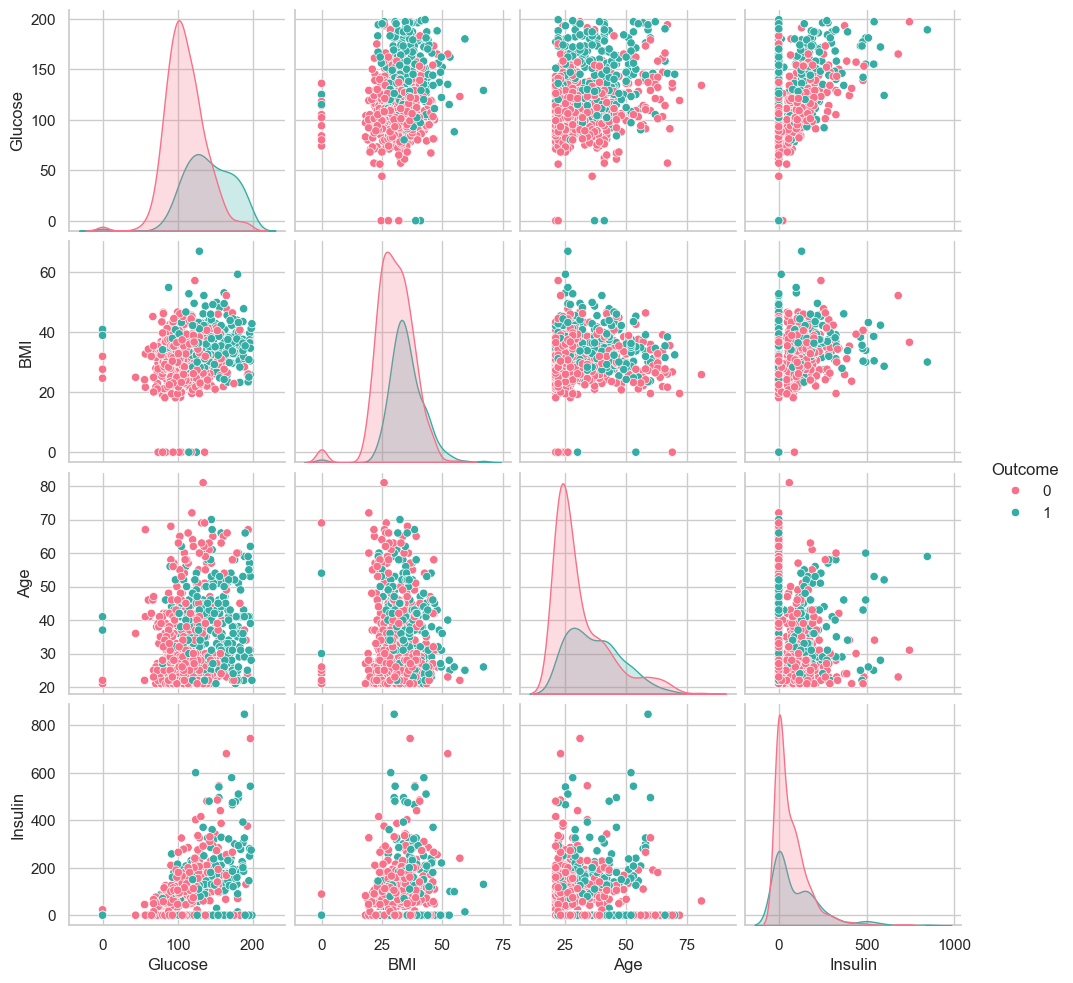

In [95]:
sns.pairplot(df, vars=['Glucose', 'BMI', 'Age', 'Insulin'], hue='Outcome', palette='husl')

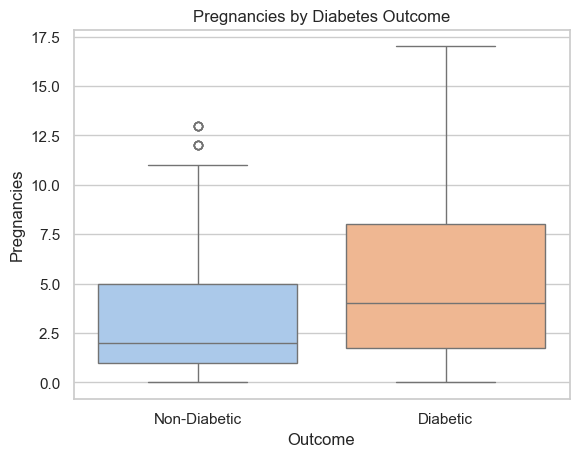

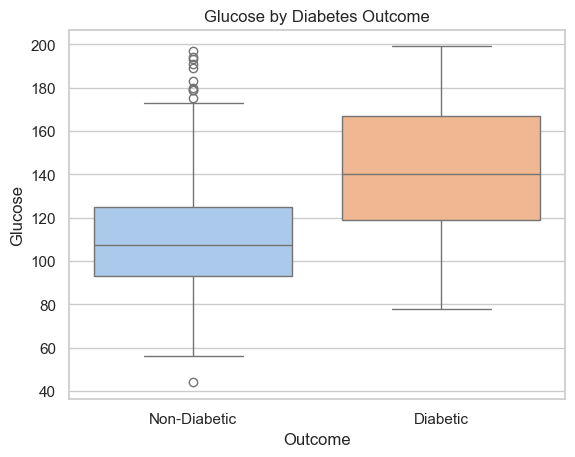

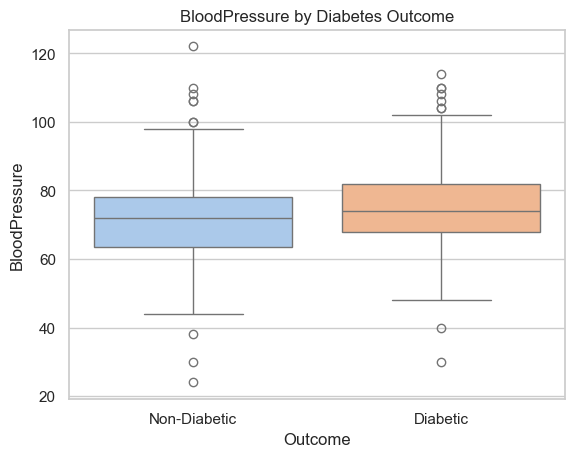

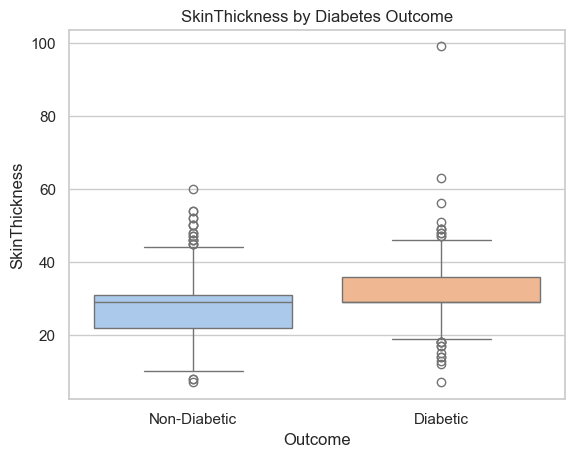

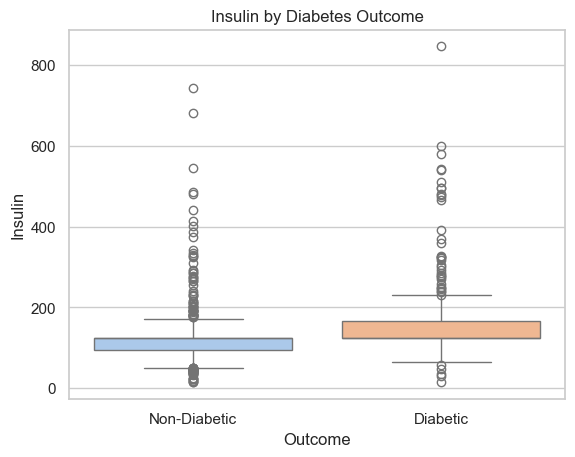

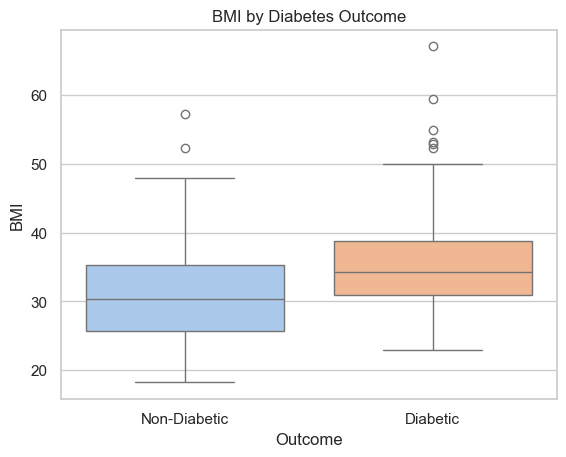

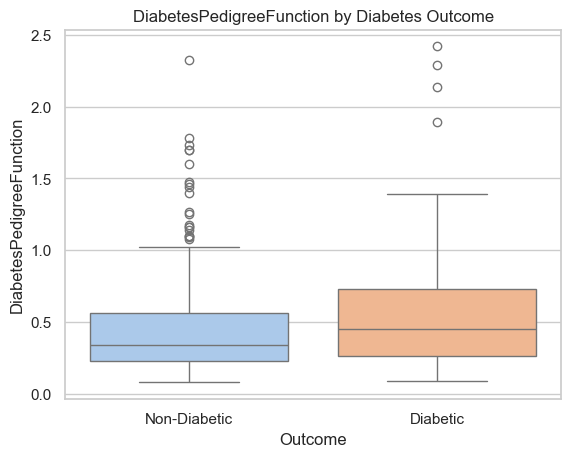

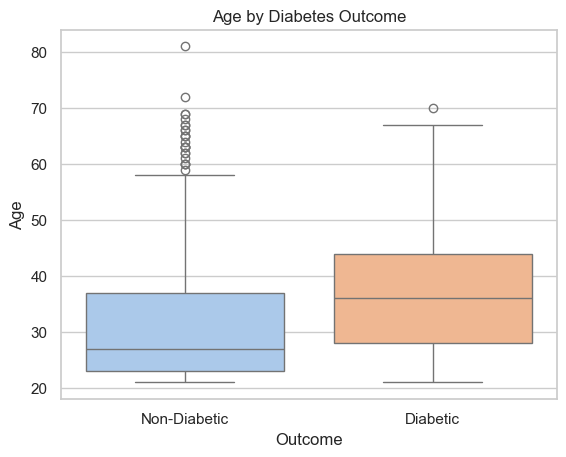

In [37]:
# Boxplots for each feature vs Outcome
features = df.columns[:-1]  # Exclude 'Outcome'

for col in features:
    sns.boxplot(x='Outcome', y=col, data=df, palette="pastel")
    plt.title(f"{col} by Diabetes Outcome")
    plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
    plt.show()

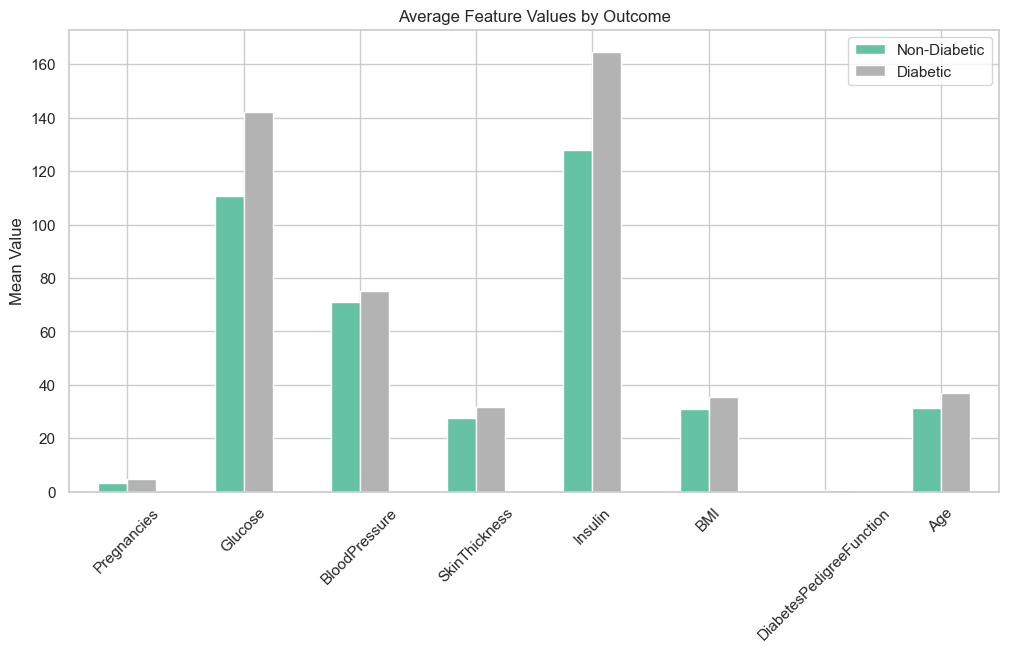

In [39]:
# Mean for each feature by Outcome
grouped = df.groupby("Outcome").mean().T
grouped.plot(kind="bar", figsize=(12,6), colormap="Set2")
plt.title("Average Feature Values by Outcome")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend(["Non-Diabetic", "Diabetic"])
plt.show()

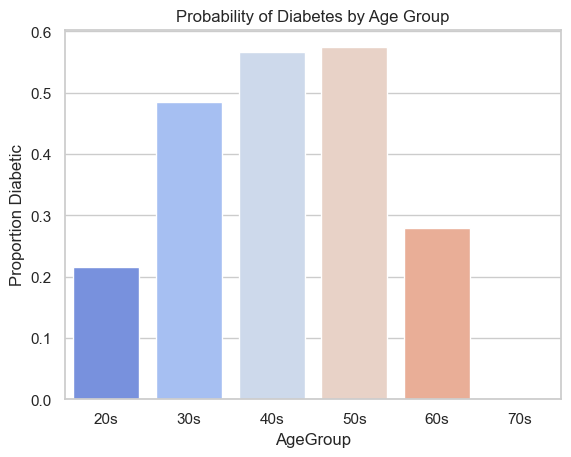

In [41]:
# Grouping ages into bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], 
                        labels=['20s', '30s', '40s', '50s', '60s', '70s'])

age_grouped = df.groupby('AgeGroup')['Outcome'].mean().reset_index()

sns.barplot(x='AgeGroup', y='Outcome', data=age_grouped, palette="coolwarm")
plt.title("Probability of Diabetes by Age Group")
plt.ylabel("Proportion Diabetic")
plt.show()

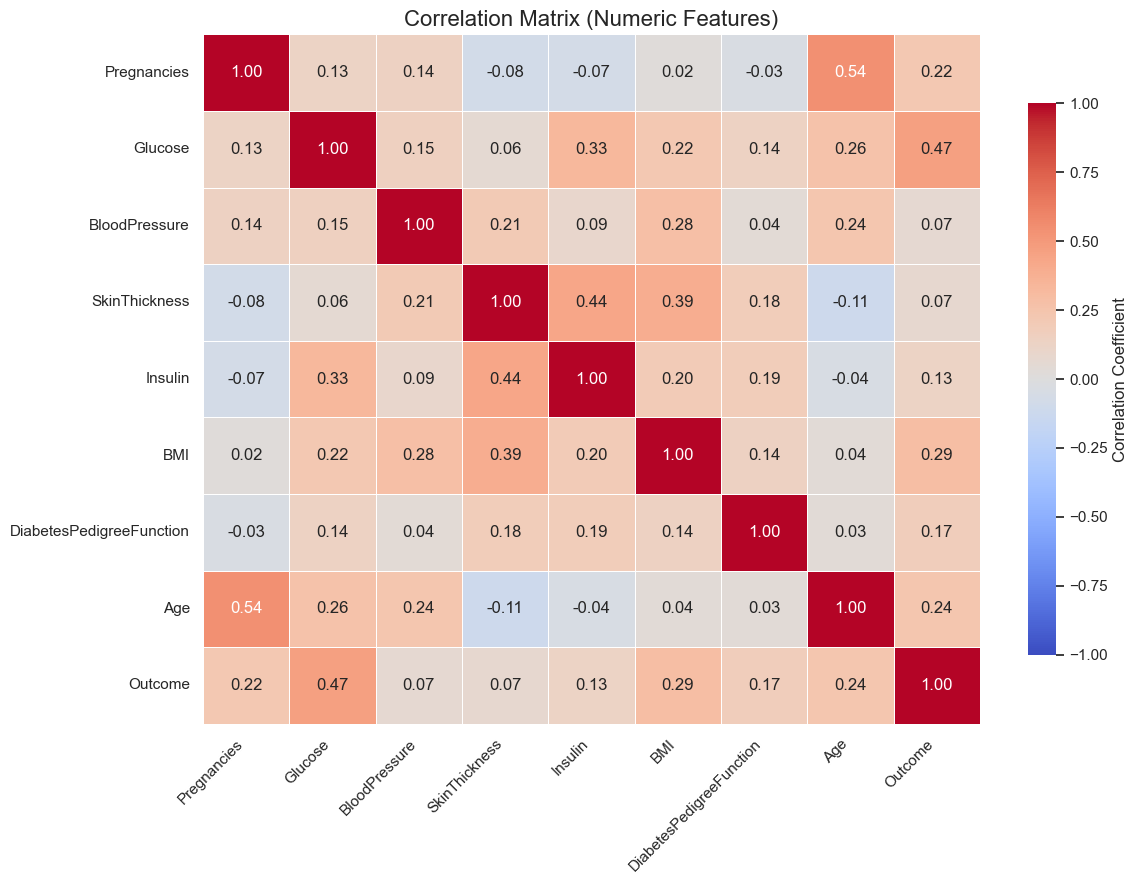

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap with a balanced colormap 'coolwarm'
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            cbar_kws={"shrink": 0.8, 'label': 'Correlation Coefficient'}, vmin=-1, vmax=1)

# Title and label adjustments
plt.title("Correlation Matrix (Numeric Features)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, va='center')

# Display the plot
plt.tight_layout()
plt.show()


In [97]:
df.to_csv('diabetes_cleaned.csv', index=False)
